In [3]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4811435261783067832
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2253809255
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6568335694539120936
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'2.7.0'

### SoftMax 함수 구현

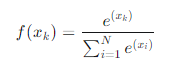

In [4]:
# softmax 함수
def softmax(x):
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [5]:
x = [0,6,1,9]

print(softmax(x))

[1.17505623e-04 4.74051519e-02 3.19413401e-04 9.52157929e-01]


### MSE & Cross_Entropy 구현

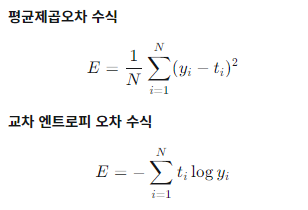

In [6]:
# 평균 제곱 오차 함수
def mean_square_error(t, y):
    result = np.mean((y - t) ** 2)
    return result


# 교차 엔트로피 오차 함수
def cross_entropy_error(t, y):
    result = (-1) * (t * np.log(y + 1e-5))
    return result

In [7]:
Y = [0,6,1,9]
T = [2,0,2,2]

mse = [mean_square_error(t,y) for t,y in zip(T,Y)]
entropy = [cross_entropy_error(t,y) for t,y in zip(T,Y)]

print(f'MSE: {mse}')
print(f'Cross_Entropy: {entropy}')

MSE: [4.0, 36.0, 1.0, 49.0]
Cross_Entropy: [23.025850929940457, -0.0, -1.9999900000797683e-05, -4.394451376893426]


### 딥러닝 모델 직접 구현

#### 정확도가 92%가 넘는 모델을 생성하세요.

In [8]:
tf.random.set_seed(42)

(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()


x_train, x_test = x_train.reshape(-1, 28, 28), x_test.reshape(-1, 28, 28)
x_train, x_test = x_train / 255, x_test / 255 

train_size = 5000
val_size = 1000

(x_train, t_train), (x_test, t_test) = (x_train[:train_size], t_train[:train_size]), (x_test[:val_size], t_test[:val_size])

In [9]:
x_train.shape, x_test.shape

((5000, 28, 28), (1000, 28, 28))

In [10]:
# 모델을 생성합니다.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])
model.summary()

model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, t_train, epochs=40, verbose=1)

Epoch 1/40
157/157 [==============================] - 2s 5ms/step - loss: 0.4983 - accuracy: 0.8526
Epoch 2/40
157/157 [==============================] - 1s 5ms/step - loss: 0.1800 - accuracy: 0.9460
Epoch 3/40
157/157 [==============================] - 1s 4ms/step - loss: 0.1088 - accuracy: 0.9678
Epoch 4/40
157/157 [==============================] - 1s 4ms/step - loss: 0.0578 - accuracy: 0.9824
Epoch 5/40
157/157 [==============================] - 1s 4ms/step - loss: 0.0419 - accuracy: 0.9888
Epoch 6/40
157/157 [==============================] - 1s 5ms/step - loss: 0.0190 - accuracy: 0.9962
Epoch 7/40
157/157 [==============================] - 1s 5ms/step - loss: 0.0091 - accuracy: 0.9976
Epoch 8/40
157/157 [==============================] - 1s 5ms/step - loss: 0.0113 - accuracy: 0.9966
Epoch 9/40
157/157 [==============================] - 1s 4ms/step - loss: 0.0120 - accuracy: 0.9978
Epoch 10/40
157/157 [==============================] - 1s 4ms/step - loss: 0.0033 - accuracy: 0.9992

In [12]:
test_eval = model.evaluate(x_test,  t_test, verbose=1)
print(f'Accuracy: {test_eval[1]}')

32/32 [==============================] - 0s 4ms/step - loss: 0.2158 - accuracy: 0.9510
Accuracy: 0.9509999752044678


In [33]:
# 모델을 생성합니다.
model = None

In [ ]:
test_eval = None
print(f'Accuracy: {test_eval[1]}')

32/32 - 0s - loss: 0.5591 - accuracy: 0.9410 - 138ms/epoch - 4ms/step
Accuracy: 0.9409999847412109
